In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [3]:
df_brazil.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR0,Brazil,180.65,0.0,13.0,1.510429,7.0,8.0,1.0,47.0,4.0,0.882373,3.0,0.0,707.225360
1,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1.0,50.0,3.0,0.306352,3.0,1.0,290.316010
2,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0.0,52.0,3.0,0.533106,3.0,1.0,109.973544
3,BR3,Brazil,182.30,0.0,4.0,-1.823701,NaN,9.0,1.0,49.0,8.0,0.777917,NaN,NaN,0.000000
4,BR4,Brazil,NaN,NaN,NaN,NaN,NaN,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_brazil.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1', 'hhsizer1',
       'wi_newr1', 'job_cat', 'pvt_sector', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

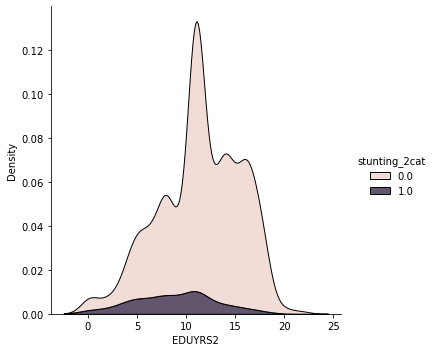

In [6]:
import seaborn as sns
sns.displot(df_brazil, x="EDUYRS2", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_brazil[['EDUYRS2']]
X = df_brazil[['stunting_2cat']]

In [8]:
formula = 'EDUYRS2 ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'EDUYRS2 ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=7.6, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=3.8)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 21 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,11.649,0.074,11.509,11.786,0.001,0.001,6623.0,6623.0,6623.0,4035.0,1.0
stunting_2cat,-2.823,0.231,-3.253,-2.399,0.003,0.002,6290.0,6279.0,6271.0,4616.0,1.0
sd,4.062,0.051,3.966,4.158,0.001,0.000,7380.0,7379.0,7365.0,3921.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

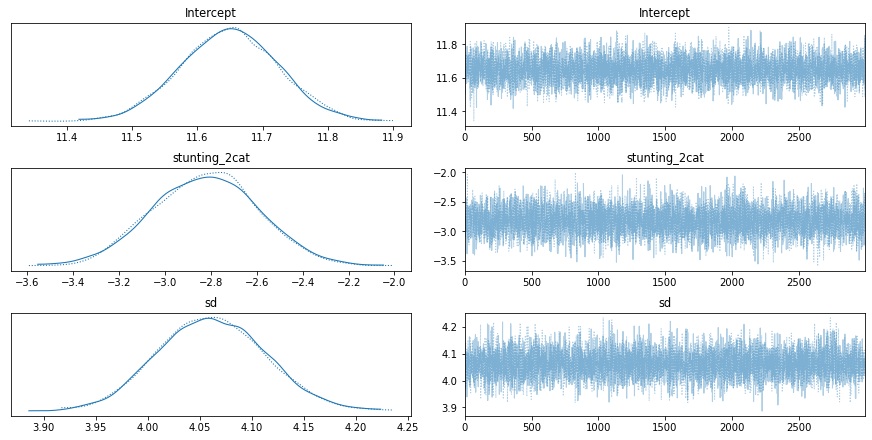

In [12]:
az.plot_trace(normal_trace)

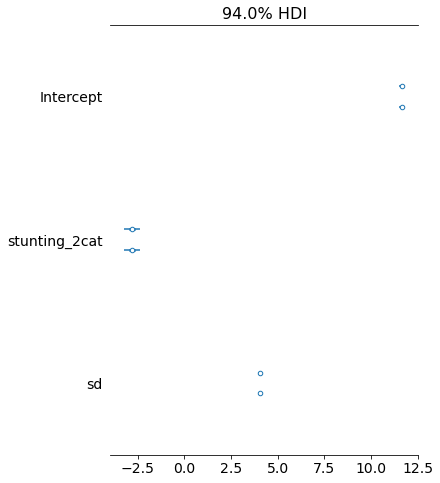

In [13]:
az.plot_forest(normal_trace);